In [1]:
import math
import collections 
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import getweather

In [3]:
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [5]:
station = 'NEW YORK'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                    for year in allyears])

In [6]:
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

In [7]:
allavg.shape

(140,)

In [8]:
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [9]:
midcentury = np.nanmean(allavg[65:75])

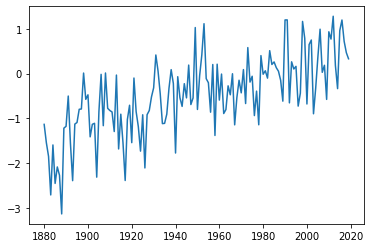

In [10]:
plt.plot(allyears, allavg - midcentury)

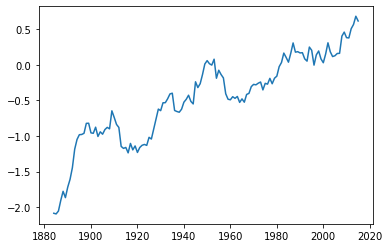

In [11]:
plt.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'))

In [13]:
#range
allyears = np.arange(1880, 2020)

def plotanomaly(station):
    #grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN', 'TMAX'], year)
                       for year in allyears])
    
    #make yearly averages, then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])
    
    #plot with smoothing, adding a label that we can show in a legend
    plt.plot(allyears[4:-4], smooth(allavg - midcentury, 9, 'valid'), label=station)
    
    #set a reasonable range
    plt.axis(ymin=-3, ymax=3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


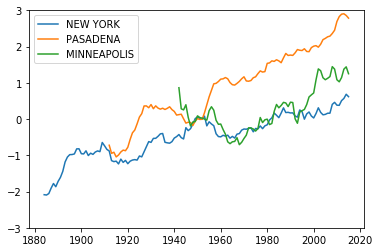

In [14]:
plotanomaly('NEW YORK')
plotanomaly('PASADENA')
plotanomaly('MINNEAPOLIS')

plt.legend()